In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np

# Data

### TODO:
- organize
- additional data exploration

In [65]:
df = pd.read_feather("news")

In [66]:
df

,Company,Author,Headline,Text,Date
0,PLAYWAY,Infostrefa ESPI,PLAYWAY SA (9/2023) Ogłoszenie o zwołaniu Zwyc...,\n\t\t\t Raport bieżący z plikiem 9/202...,2023-06-02 19:52:57
1,PLAYWAY,Puls Biznesu,Mapa GPW: dwie zielone wyspy na morzu czerwien...,\n\t\t\t Huuuge i OT Logistics to spółk...,2023-05-31 11:49:16
2,PLAYWAY,Infostrefa News,Wyniki PlayWay w I kw. 2023 roku vs. konsensus...,\n\t\t\t Poniżej przedstawiamy wyniki P...,2023-05-30 19:05:47
3,PLAYWAY,Infostrefa Rap Kwart,PLAYWAY SA Raport okresowy kwartalny skonsolid...,\n\t\t\t Raport okresowy kwartalny skon...,2023-05-30 18:57:25
4,PLAYWAY,ISBiznes.pl,"PlayWay dokonał 12,1 mln zł odpisów aktualizuj...",\n,2023-05-30 07:31:35
...,...,...,...,...,...
995,DINOPL,portalspozywczy.pl,Nietypowe znalezisko na budowie marketu Dino. ...,\n\t\t\t Podczas prowadzonych prac ziem...,2023-05-24 17:36:18
996,DINOPL,portalspozywczy.pl,Dino kusi cenami. Znowu to zrobili. Sieć też r...,\n\t\t\t Nowe gazetkowe promocje w Dino...,2023-05-24 15:33:22
997,DINOPL,portalspozywczy.pl,"800 zamiast 500 plus. Czy spożywka i handel ""o...","\n\t\t\t Zdaniem analityków, zmiana 500...",2023-05-18 08:08:35
998,DINOPL,portalspozywczy.pl,"Dino znów zaskakuje klientów. Atrakcyjne ceny,...",\n\t\t\t Od środy 17 maja w sklepach Di...,2023-05-17 10:24:29


In [67]:
df\
.groupby("Company")\
.count()

,Author,Headline,Text,Date
Company,,,,
DINOPL,200,200,200,200
GPW,200,200,200,200
KGHM,200,200,200,200
LPP,200,200,200,200
PLAYWAY,200,200,200,200


In [68]:
df\
.groupby("Author")\
.count()

,Company,Headline,Text,Date
Author,,,,
ISBiznes.pl,82,82,82,82
Infostrefa Akcjonariat,1,1,1,1
Infostrefa Dywidendy,1,1,1,1
Infostrefa EBI,5,5,5,5
Infostrefa ESPI,93,93,93,93
Infostrefa News,28,28,28,28
Infostrefa Rap Kwart,3,3,3,3
Infostrefa Rap Roczne,1,1,1,1
Infostrefa Raporty DM,14,14,14,14


In [69]:
type(df.loc[0, "Date"])

str

In [70]:
df['Date'] = df['Date'].apply(lambda row : datetime.strptime(row, '%Y-%m-%d %H:%M:%S'))

In [71]:
df.drop(df[df['Date'] >= '2023-06-01 00:00:00'].index, inplace = True)
df.drop(df[df['Date'] < '2022-08-04 10:00:00'].index, inplace = True)

In [72]:
df.reset_index(inplace=True)

In [73]:
df['Date'][0]

Timestamp('2023-05-31 11:49:16')

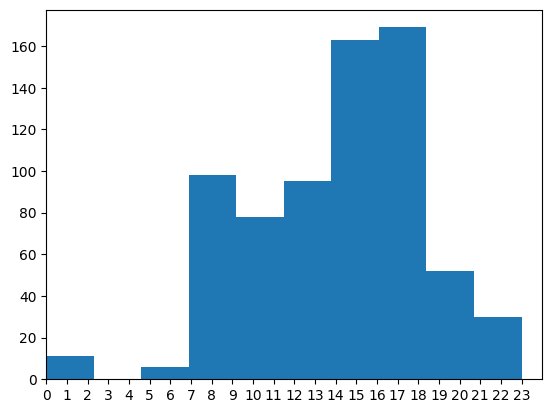

In [74]:
hour_list = [t.hour for t in df['Date']]
numbers = [x for x in range(0,24)]
labels = map(lambda x: str(x), numbers)

plt.xticks(numbers, labels)
plt.xlim(0, 24)
plt.hist(hour_list)

plt.show()

GPW run sessions between 9 and 17 so I will assume that news that appear between: 
- 17 t-1 untill 9 t will be disconted by return of t-1 close and t close,
- 9 t-1 untill 13 t will be disconted by return of apperance time and t close,
- 13 t-1 untill 17 t will be disconted by return of apperance time and t+1 close

In [75]:
def hour_round(t):
    hours_add = t.minute//30
    if t.hour == 23 and hours_add == 1:
        h = 0
    else:
        h = t.hour + hours_add
    return t.replace(second=0, microsecond=0, minute=0, hour=h)

In [76]:
df['Date'] = df['Date'].apply(lambda t: hour_round(t))

In [77]:
df

,index,Company,Author,Headline,Text,Date
0,1,PLAYWAY,Puls Biznesu,Mapa GPW: dwie zielone wyspy na morzu czerwien...,\n\t\t\t Huuuge i OT Logistics to spółk...,2023-05-31 12:00:00
1,2,PLAYWAY,Infostrefa News,Wyniki PlayWay w I kw. 2023 roku vs. konsensus...,\n\t\t\t Poniżej przedstawiamy wyniki P...,2023-05-30 19:00:00
2,3,PLAYWAY,Infostrefa Rap Kwart,PLAYWAY SA Raport okresowy kwartalny skonsolid...,\n\t\t\t Raport okresowy kwartalny skon...,2023-05-30 19:00:00
3,4,PLAYWAY,ISBiznes.pl,"PlayWay dokonał 12,1 mln zł odpisów aktualizuj...",\n,2023-05-30 08:00:00
4,5,PLAYWAY,PAP Biznes,"PlayWay utworzy odpisy, które obniżą wynik za ...",\n\t\t\t PlayWay zdecydował o utworzeni...,2023-05-29 20:00:00
...,...,...,...,...,...,...
697,995,DINOPL,portalspozywczy.pl,Nietypowe znalezisko na budowie marketu Dino. ...,\n\t\t\t Podczas prowadzonych prac ziem...,2023-05-24 18:00:00
698,996,DINOPL,portalspozywczy.pl,Dino kusi cenami. Znowu to zrobili. Sieć też r...,\n\t\t\t Nowe gazetkowe promocje w Dino...,2023-05-24 16:00:00
699,997,DINOPL,portalspozywczy.pl,"800 zamiast 500 plus. Czy spożywka i handel ""o...","\n\t\t\t Zdaniem analityków, zmiana 500...",2023-05-18 08:00:00
700,998,DINOPL,portalspozywczy.pl,"Dino znów zaskakuje klientów. Atrakcyjne ceny,...",\n\t\t\t Od środy 17 maja w sklepach Di...,2023-05-17 10:00:00


# Returns

### TODO:
- organize

In [78]:
mapping = {"PLAYWAY": "PLW", "DINOPL": "DNP", "GPW": "GPW", "KGHM": "KGH", "LPP": "LPP"}

In [79]:
stock = []
for i in mapping.values():
    with open(f'quotes\{i.lower()}.txt') as f:
        next(f)
        stock.append(f.readlines())
        
flat_list = [item for sublist in stock for item in sublist]
stock_list = [list.split(',') for list in flat_list]
df_stock = pd.DataFrame(stock_list, 
                        columns=['<TICKER>','<PER>','<DATE>','<TIME>','<OPEN>','<HIGH>','<LOW>','<CLOSE>','<VOL>','<OPENINT>'])

In [80]:
df_stock

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>,<OPENINT>
0,PLW,60,20220804,100000,317,318,312.5,316,103,0\n
1,PLW,60,20220804,110000,317,317,316,316,15,0\n
2,PLW,60,20220804,120000,316,321,316,318,216,0\n
3,PLW,60,20220804,130000,320,324.5,320,321.5,125,0\n
4,PLW,60,20220804,140000,323.5,329.5,322.5,328.5,158,0\n
...,...,...,...,...,...,...,...,...,...,...
8223,LPP,60,20230531,130000,12200,12240,12180,12180,173,0\n
8224,LPP,60,20230531,140000,12180,12210,12110,12110,211,0\n
8225,LPP,60,20230531,150000,12110,12230,12020,12120,277,0\n
8226,LPP,60,20230531,160000,12100,12160,12030,12080,295,0\n


In [81]:
df_stock['<DATE>'] = pd.to_datetime(df_stock['<DATE>'] + ' ' + df_stock['<TIME>'])

In [82]:
df_stock

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>,<OPENINT>
0,PLW,60,2022-08-04 10:00:00,100000,317,318,312.5,316,103,0\n
1,PLW,60,2022-08-04 11:00:00,110000,317,317,316,316,15,0\n
2,PLW,60,2022-08-04 12:00:00,120000,316,321,316,318,216,0\n
3,PLW,60,2022-08-04 13:00:00,130000,320,324.5,320,321.5,125,0\n
4,PLW,60,2022-08-04 14:00:00,140000,323.5,329.5,322.5,328.5,158,0\n
...,...,...,...,...,...,...,...,...,...,...
8223,LPP,60,2023-05-31 13:00:00,130000,12200,12240,12180,12180,173,0\n
8224,LPP,60,2023-05-31 14:00:00,140000,12180,12210,12110,12110,211,0\n
8225,LPP,60,2023-05-31 15:00:00,150000,12110,12230,12020,12120,277,0\n
8226,LPP,60,2023-05-31 16:00:00,160000,12100,12160,12030,12080,295,0\n


In [83]:
(df['Date'] == '2023-05-29 20:00:00') & (df['Company'] == 'PLAYWAY')

0      False
1      False
2      False
3      False
4       True
       ...  
697    False
698    False
699    False
700    False
701    False
Length: 702, dtype: bool

In [84]:
#TODO: simplify
for c in mapping.items():
    cmp, tick = c
    df_cmp = df[df['Company'] == cmp]
    for t in df_cmp['Date']:
        if t.weekday() == 5:
            start = t.replace(hour=17) - timedelta(days=1)
            end = t.replace(hour=17) + timedelta(days=2)
        elif t.weekday() == 6:
            start = t.replace(hour=17) - timedelta(days=2)
            end = t.replace(hour=17) + timedelta(days=1)
        elif t.hour > 17:
            start = t.replace(hour=17)
            if t.weekday() == 4:
                end = t.replace(hour=17) + timedelta(days=3)
            else:
                end = t.replace(hour=17) + timedelta(days=1)
        elif t.hour < 10:
            if t.weekday() == 0:
                start = t.replace(hour=17) - timedelta(days=3)
            else:
                start = t.replace(hour=17) - timedelta(days=1)
            end = t.replace(hour=17)
        else:
            start = t
            if start.hour < 14:
                end = t.replace(hour=17)
            else:
                if t.weekday() == 4:
                    end = t.replace(hour=17) + timedelta(days=3)
                else:
                    end = t.replace(hour=17) + timedelta(days=1)

        base_price = df_stock[(df_stock['<DATE>'] == start) & (df_stock['<TICKER>'] == tick)]['<CLOSE>']
        new_price = df_stock[(df_stock['<DATE>'] == end) & (df_stock['<TICKER>'] == tick)]['<CLOSE>']

#         print(base_price.values.size)
#         print(new_price.values.size)
            
        if (base_price.values.size != 0) & (new_price.values.size != 0):
            df.loc[(df['Date'] == t) & (df['Company'] == cmp), 'Return'] = ((float(new_price.values[0]) - float(base_price.values[0]))/float(base_price.values[0]))*100
#             print(base_price.values.size)
#             print(new_price.values.size)
        else:
            df.loc[(df['Date'] == t) & (df['Company'] == cmp), 'Return'] = 'NA'

In [85]:
df

,index,Company,Author,Headline,Text,Date,Return
0,1,PLAYWAY,Puls Biznesu,Mapa GPW: dwie zielone wyspy na morzu czerwien...,\n\t\t\t Huuuge i OT Logistics to spółk...,2023-05-31 12:00:00,-1.403061
1,2,PLAYWAY,Infostrefa News,Wyniki PlayWay w I kw. 2023 roku vs. konsensus...,\n\t\t\t Poniżej przedstawiamy wyniki P...,2023-05-30 19:00:00,-6.18932
2,3,PLAYWAY,Infostrefa Rap Kwart,PLAYWAY SA Raport okresowy kwartalny skonsolid...,\n\t\t\t Raport okresowy kwartalny skon...,2023-05-30 19:00:00,-6.18932
3,4,PLAYWAY,ISBiznes.pl,"PlayWay dokonał 12,1 mln zł odpisów aktualizuj...",\n,2023-05-30 08:00:00,2.743142
4,5,PLAYWAY,PAP Biznes,"PlayWay utworzy odpisy, które obniżą wynik za ...",\n\t\t\t PlayWay zdecydował o utworzeni...,2023-05-29 20:00:00,2.743142
...,...,...,...,...,...,...,...
697,995,DINOPL,portalspozywczy.pl,Nietypowe znalezisko na budowie marketu Dino. ...,\n\t\t\t Podczas prowadzonych prac ziem...,2023-05-24 18:00:00,1.069646
698,996,DINOPL,portalspozywczy.pl,Dino kusi cenami. Znowu to zrobili. Sieć też r...,\n\t\t\t Nowe gazetkowe promocje w Dino...,2023-05-24 16:00:00,1.117717
699,997,DINOPL,portalspozywczy.pl,"800 zamiast 500 plus. Czy spożywka i handel ""o...","\n\t\t\t Zdaniem analityków, zmiana 500...",2023-05-18 08:00:00,-1.567696
700,998,DINOPL,portalspozywczy.pl,"Dino znów zaskakuje klientów. Atrakcyjne ceny,...",\n\t\t\t Od środy 17 maja w sklepach Di...,2023-05-17 10:00:00,-0.54335


In [86]:
df[df['Company'] == 'PLAYWAY']

,index,Company,Author,Headline,Text,Date,Return
0,1,PLAYWAY,Puls Biznesu,Mapa GPW: dwie zielone wyspy na morzu czerwien...,\n\t\t\t Huuuge i OT Logistics to spółk...,2023-05-31 12:00:00,-1.403061
1,2,PLAYWAY,Infostrefa News,Wyniki PlayWay w I kw. 2023 roku vs. konsensus...,\n\t\t\t Poniżej przedstawiamy wyniki P...,2023-05-30 19:00:00,-6.18932
2,3,PLAYWAY,Infostrefa Rap Kwart,PLAYWAY SA Raport okresowy kwartalny skonsolid...,\n\t\t\t Raport okresowy kwartalny skon...,2023-05-30 19:00:00,-6.18932
3,4,PLAYWAY,ISBiznes.pl,"PlayWay dokonał 12,1 mln zł odpisów aktualizuj...",\n,2023-05-30 08:00:00,2.743142
4,5,PLAYWAY,PAP Biznes,"PlayWay utworzy odpisy, które obniżą wynik za ...",\n\t\t\t PlayWay zdecydował o utworzeni...,2023-05-29 20:00:00,2.743142
...,...,...,...,...,...,...,...
88,89,PLAYWAY,Parkiet,"Inwestorzy zwracają uwagę na brak zadłużenia, ...",\n\t\t\t \n Inwestorzy zwra...,2022-10-01 12:00:00,-1.428571
89,90,PLAYWAY,PAP Biznes,Wyniki Playway w II kw. 2022 roku vs. konsensu...,\n\t\t\t Poniżej przedstawiamy wyniki P...,2022-09-30 19:00:00,-1.428571
90,91,PLAYWAY,Infostrefa Wyniki Fin,PLAYWAY SA Raport okresowy półroczny za 2022 PSr,\n\t\t\t Raport okresowy półroczny za 2...,2022-09-30 18:00:00,-1.428571
91,92,PLAYWAY,NA,"Wrześniowa dziesiątka, czyli inwestycyjne typy...",\n\t\t\t\t\tBiorąc pod uwagę fatalne osiągi za...,2022-09-02 12:00:00,-1.623377


In [87]:
df[df['Return'] == 'NA']

,index,Company,Author,Headline,Text,Date,Return
23,24,PLAYWAY,Infostrefa Wyniki Fin,PLAYWAY SA Raport okresowy roczny skonsolidowa...,\n\t\t\t Raport okresowy roczny skonsol...,2023-04-28 23:00:00,NA
24,25,PLAYWAY,Infostrefa Wyniki Fin,PLAYWAY SA Raport okresowy roczny RR,\n\t\t\t Raport okresowy roczny RR\n\t\...,2023-04-28 23:00:00,NA
25,26,PLAYWAY,ISBiznes.pl,"PlayWay dokonał 4,46 mln zł odpisów aktualizuj...",\n,2023-04-07 12:00:00,NA
26,27,PLAYWAY,Puls Biznesu,PlayWay dokona odpisów aktywów PlayWay dokona ...,\n\t\t\t W skonsolidowanym sprawozdaniu...,2023-04-07 10:00:00,NA
27,28,PLAYWAY,Infostrefa News,PlayWay dokonał dwóch odpisów w sprawozdaniach...,\n\t\t\t PlayWay dokonał dwóch odpisów ...,2023-04-06 19:00:00,NA
28,29,PLAYWAY,PAP Biznes,PlayWay dokonał dwóch odpisów w sprawozdaniach...,\n\t\t\t PlayWay dokonał dwóch odpisów ...,2023-04-06 18:00:00,NA
29,30,PLAYWAY,Infostrefa ESPI,PLAYWAY SA (5/2023) Informacja o dokonaniu odp...,\n\t\t\t Raport bieżący 5/2023\n\t\t\t,2023-04-06 18:00:00,NA
93,207,LPP,ISBiznes.pl,LPP zdecydował o zakończeniu buy-backu,\n,2023-05-31 20:00:00,NA
94,208,LPP,ISBiznes.pl,LPP zakłada przeznaczanie 50-70% zysków na dyw...,\n,2023-05-31 20:00:00,NA
95,209,LPP,PAP Biznes,LPP rekomenduje przeznaczenie co najmniej 50 p...,\n\t\t\t Zarząd LPP będzie rekomendował...,2023-05-31 18:00:00,NA


In [88]:
# TODO: Business holidays
df.drop(df[df['Return'] == 'NA'].index, inplace = True)
df.reset_index(inplace=True)

In [89]:
df[df['Return'] == 'NA']

,level_0,index,Company,Author,Headline,Text,Date,Return


In [90]:
type(df['Return'][0])

float

In [91]:
df.describe()

,level_0,index,Date
count,653.000000,653.000000,653
mean,349.969372,528.667688,2023-03-20 22:55:57.427258880
min,0.000000,1.000000,2022-08-09 13:00:00
25%,178.000000,292.000000,2023-01-23 10:00:00
50%,353.000000,576.000000,2023-04-26 19:00:00
75%,517.000000,745.000000,2023-05-25 16:00:00
max,701.000000,999.000000,2023-05-31 12:00:00
std,198.970022,279.601400,NaN


# Model

In [92]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from sklearn.preprocessing import MinMaxScaler
import re

In [93]:
def deep_model(model, X_train, y_train, X_valid, y_valid):
    '''
    Function to train a multi-class model. The number of epochs and 
    batch_size are set by the constants at the top of the
    notebook. 
    
    Parameters:
        model : model with the chosen architecture
        X_train : training features
        y_train : training target
        X_valid : validation features
        Y_valid : validation target
    Output:
        model training history
    '''
    model.compile(optimizer='adam'
                  , loss='mse'
                  , metrics=['mse'])
    
    history = model.fit(X_train
                       , y_train
                       , epochs=15
                       , batch_size=32
                       , validation_data=(X_valid, y_valid)
                       , verbose=1)
    return history

In [94]:
df['Text'] = df['Headline'] + " " + df['Text']

In [95]:
scaler = MinMaxScaler(copy=False, feature_range=(-1, 1))
scaler.fit_transform(df[['Return']])

array([[-0.54993785],
       [-0.91353056],
       [-0.91353056],
       [-0.23496759],
       [-0.23496759],
       [-0.23496759],
       [-0.47166327],
       [-0.42443245],
       [-0.52765551],
       [-0.52828385],
       [-0.54690012],
       [-0.54690012],
       [-0.54690012],
       [-0.32306585],
       [-0.1303065 ],
       [-0.3962277 ],
       [-0.3962277 ],
       [-0.3962277 ],
       [-0.3962277 ],
       [-0.3962277 ],
       [-0.3962277 ],
       [-0.37713111],
       [-0.5658787 ],
       [-0.43455044],
       [-0.19981234],
       [-0.59618388],
       [-0.57362684],
       [-0.59944739],
       [-0.59944739],
       [-0.38915611],
       [-0.33108803],
       [-0.33108803],
       [-0.24809167],
       [-0.20011226],
       [-0.4620638 ],
       [-0.53951241],
       [-0.29027299],
       [-0.48167124],
       [-0.40583893],
       [-0.30804468],
       [-0.1268282 ],
       [-0.71056988],
       [-0.1268282 ],
       [-0.56022367],
       [-0.45288447],
       [-0

In [96]:
df['Text'].apply(lambda x: re.sub(' +', ' ', x))

0      Mapa GPW: dwie zielone wyspy na morzu czerwien...
1      Wyniki PlayWay w I kw. 2023 roku vs. konsensus...
2      PLAYWAY SA Raport okresowy kwartalny skonsolid...
3      PlayWay dokonał 12,1 mln zł odpisów aktualizuj...
4      PlayWay utworzy odpisy, które obniżą wynik za ...
                             ...                        
648    Nietypowe znalezisko na budowie marketu Dino. ...
649    Dino kusi cenami. Znowu to zrobili. Sieć też r...
650    800 zamiast 500 plus. Czy spożywka i handel "o...
651    Dino znów zaskakuje klientów. Atrakcyjne ceny,...
652    Te 3 sieci handlowe rządzą dziś na polskim Fac...
Name: Text, Length: 653, dtype: object

In [97]:
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Return'], test_size=0.1, random_state=37)

In [98]:
# TODO: add author to madel
# X_train = pd.get_dummies(data=X_train, columns=['Author'])
# X_test = pd.get_dummies(data=X_test, columns=['Author'])

In [99]:
X_train

21     [BR Premium] Co robią grube ryby: Goldman Sach...
152    Menedżerowie LPP sprzedali część akcji Menedże...
400    KGHM największą kopalnią srebra na świecie KGH...
188    Wartości kluczem do budowania marki pracodawcy...
130    [BR Premium] Co robią grube ryby: Quercus TFI ...
                             ...                        
634    Ogromna inwestycja Dino. Polska sieć wyda 130 ...
22     List do akcjonariuszy PlayWay oraz wybrane wyn...
437    KGHM miał 4,77 mld zł zysku netto w 2022 r. \n...
251    Rekordowa EBITDA pcha w górę kurs spółki z GPW...
363    KGHM podsumowuje wyniki za I kwartał 2023 roku...
Name: Text, Length: 587, dtype: object

In [100]:
tk = Tokenizer(num_words=10000,
               filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
               lower=True,
               split=" ")

tk.fit_on_texts(X_train)

X_train_seq = tk.texts_to_sequences(X_train)
X_test_seq = tk.texts_to_sequences(X_test)

In [101]:
X_train_seq

[[96,
  102,
  40,
  106,
  112,
  117,
  812,
  813,
  53,
  4,
  131,
  3,
  1011,
  40,
  1012,
  2,
  556,
  153,
  812,
  813,
  1317,
  107,
  34,
  1318,
  611,
  5,
  814,
  1319,
  1013,
  189,
  1320,
  239,
  312,
  173,
  815,
  48,
  1,
  154],
 [1321,
  9,
  1014,
  557,
  35,
  1321,
  9,
  1014,
  557,
  35,
  240,
  241,
  4,
  1322,
  2111,
  2112,
  9,
  2,
  242,
  2113,
  1014,
  557,
  2114,
  35],
 [6,
  1015,
  1016,
  351,
  2,
  685,
  6,
  1015,
  1016,
  351,
  2,
  685,
  6,
  1017,
  414,
  494,
  1,
  1323,
  190,
  1018,
  351,
  2,
  685,
  1,
  1324,
  1325,
  1326,
  1327,
  3,
  125,
  1,
  243,
  1019,
  39,
  1020,
  48,
  1,
  1328,
  190,
  816,
  351,
  6,
  1329,
  14,
  2,
  352,
  558],
 [415,
  1330,
  10,
  1331,
  612,
  1332,
  415,
  1330,
  10,
  1331,
  612,
  1332,
  1322,
  2115,
  2116,
  1333,
  2117,
  4,
  2118,
  9],
 [96,
  102,
  40,
  106,
  112,
  117,
  1021,
  53,
  4,
  131,
  3,
  817,
  131,
  34,
  818,
  686,
  11,
  

In [102]:
seq_lengths = X_train.apply(lambda x: len(x.split(' ')))
seq_lengths.describe()

count    587.000000
mean      46.701874
std       34.520579
min        8.000000
25%       31.500000
50%       46.000000
75%       59.000000
max      540.000000
Name: Text, dtype: float64

In [103]:
seq_lengths_2 = [len(x) for x in X_train_seq]
print(min(seq_lengths_2))
print(max(seq_lengths_2))

5
614


In [104]:
X_train

21     [BR Premium] Co robią grube ryby: Goldman Sach...
152    Menedżerowie LPP sprzedali część akcji Menedże...
400    KGHM największą kopalnią srebra na świecie KGH...
188    Wartości kluczem do budowania marki pracodawcy...
130    [BR Premium] Co robią grube ryby: Quercus TFI ...
                             ...                        
634    Ogromna inwestycja Dino. Polska sieć wyda 130 ...
22     List do akcjonariuszy PlayWay oraz wybrane wyn...
437    KGHM miał 4,77 mld zł zysku netto w 2022 r. \n...
251    Rekordowa EBITDA pcha w górę kurs spółki z GPW...
363    KGHM podsumowuje wyniki za I kwartał 2023 roku...
Name: Text, Length: 587, dtype: object

In [105]:
counter = 0
for x in X_train:
    if len(x.split(" ")) > 60:
        print(x)
        counter +=1
print(counter)

GPW: w sprawie dopuszczenia i wprowadzenia do obrotu na Głównym Rynku GPW akcji zwykłych na okaziciela serii G spółki ALTA S.A 
			        Uchwała Nr 446/2023 Zarządu Giełdy Papierów Wartościowych w Warszawie S.A. z dnia 24 maja 2023 r. w sprawie dopuszczenia i wprowadzenia do obrotu giełdowego na Głównym Rynku GPW akcji zwykłych na okaziciela serii G spółki ALTA S.A.
			    
Sprzedaż miedzi przez grupę KGHM wyniosła w grudniu 52,8 tys. ton. To spadek rdr o 10 proc. 
			          Sprzedaż miedzi przez grupę KGHM wyniosła w grudniu 52,8 tys. ton i była niższa rdr o 10 proc. Produkcja miedzi płatnej KGHM wyniosła w tym czasie 55,7 tys. ton, co oznacza spadek rdr o 3 proc. - podała grupa w komunikacie, dotyczącym wstępnych wyników produkcyjnych i sprzedażowych. 
			    
Prezes KGHM: decyzja Komisji Dozoru Jądrowego USA przybliża nas do realizacji planów ws. atomu 
			        Decyzja amerykańskiego regulatora to przełomowy moment, który przybliża nas do realizacji własnych planów dot. atom

In [106]:
X_train_seq_trunc = pad_sequences(X_train_seq, maxlen=80)
X_test_seq_trunc = pad_sequences(X_test_seq, maxlen=80)

In [44]:
embeddings = {}
with open("pl-embeddings-skip.txt", mode='rt', encoding="utf8") as f:
    embeddings = {l.split()[0]: np.array(l.split()[1:]).astype('float32') for l in f}

In [45]:
embeddings

{'933198': array([100.], dtype=float32),
 '</s>': array([ 4.003e-03,  4.419e-03, -3.830e-03, -3.278e-03,  1.367e-03,
         3.021e-03,  9.410e-04,  2.110e-04, -3.604e-03,  2.218e-03,
        -4.356e-03,  1.250e-03, -7.510e-04, -9.570e-04, -3.316e-03,
        -1.882e-03,  2.579e-03,  3.025e-03,  2.969e-03,  1.597e-03,
         1.545e-03, -3.803e-03, -4.096e-03,  4.970e-03,  3.801e-03,
         3.090e-03, -6.040e-04,  4.016e-03, -4.950e-04,  7.350e-04,
        -1.490e-04, -2.983e-03,  1.312e-03, -1.337e-03, -3.825e-03,
         4.754e-03,  4.379e-03, -1.095e-03, -2.260e-04,  5.090e-04,
        -3.638e-03, -4.007e-03,  4.555e-03,  6.300e-05, -2.582e-03,
        -3.042e-03, -3.076e-03,  1.697e-03,  2.010e-04,  1.331e-03,
        -4.214e-03, -3.808e-03, -1.300e-04,  1.144e-03,  2.550e-03,
        -3.170e-03,  4.080e-03,  9.270e-04,  1.120e-03, -6.080e-04,
         2.986e-03, -2.288e-03, -2.097e-03,  2.158e-03, -7.530e-04,
         1.031e-03,  1.805e-03, -4.089e-03, -1.983e-03,  2.914e-03,

In [46]:
embeddings['dywidenda']

array([-0.266536,  0.040312,  0.875124, -0.798659,  0.867121,  0.931002,
       -0.284104, -1.112939, -0.47954 ,  0.511097, -0.322948,  0.485137,
        1.25858 ,  0.881049,  0.102876,  0.722581, -0.39343 , -0.129943,
       -0.447877, -0.389228,  0.448516, -0.708302,  1.403812, -0.516813,
       -0.488191,  0.226744, -0.535846, -0.718151,  0.484075,  0.066418,
       -0.861163, -0.127869,  0.017477,  0.174832, -0.539064,  0.394054,
       -0.2974  , -0.78211 ,  0.311912, -0.063425,  0.638258, -0.825092,
       -0.268071, -0.499609, -0.222198,  0.149423, -0.142879,  0.317079,
        0.974509, -0.126922, -0.630879,  0.462824,  0.029691,  0.36385 ,
        0.567186, -0.423124, -0.788354, -0.550667, -0.200888, -0.440256,
        1.290893,  0.295323, -0.774936,  0.568726,  0.370841,  0.648313,
        1.588679,  0.107853,  0.731486,  0.836317, -0.186761, -0.486988,
       -1.092643,  0.151492, -0.868233, -0.122659,  0.399578, -0.124089,
        0.995891,  0.941002, -0.200161, -0.581556, 

In [107]:
from keras import models
from keras import layers

In [48]:
emb_matrix = np.zeros((10000, 100))

for w, i in tk.word_index.items():
    # The word_index contains a token for all words of the training data so we need to limit that
    if i < 10000:
        vect = embeddings.get(w)
        # Check if the word from the training data occurs in the GloVe word embeddings
        # Otherwise the vector is kept with only zeros
        if vect is not None:
            emb_matrix[i] = vect
    else:
        break

In [51]:
model = models.Sequential()
model.add(layers.Embedding(10000, 100, input_length = 80))
model.add(layers.LSTM(32))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='tanh'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 80, 100)           1000000   
                                                                 
 lstm (LSTM)                 (None, 32)                17024     
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,021,249
Trainable params: 1,021,249
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.layers[0].set_weights([emb_matrix])
model.layers[0].trainable = False
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 80, 100)           1000000   
                                                                 
 lstm (LSTM)                 (None, 32)                17024     
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,021,249
Trainable params: 21,249
Non-trainable params: 1,000,000
_________________________________________________________________


In [108]:
X_train_seq_trunc

array([[   0,    0,    0, ...,   48,    1,  154],
       [   0,    0,    0, ...,  557, 2114,   35],
       [   0,    0,    0, ...,    2,  352,  558],
       ...,
       [   0,    0,    0, ...,  760,   86,   39],
       [   0,    0,    0, ..., 3942, 1212, 1372],
       [   0,    0,    0, ...,   69,   22,   13]])

In [109]:
X_train_seq_trunc = np.asarray(X_train_seq_trunc).astype('float32')
X_test_seq_trunc = np.asarray(X_test_seq_trunc).astype('float32')

y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

In [110]:
X_train_seq_trunc

array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 4.800e+01, 1.000e+00,
        1.540e+02],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 5.570e+02, 2.114e+03,
        3.500e+01],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 2.000e+00, 3.520e+02,
        5.580e+02],
       ...,
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 7.600e+02, 8.600e+01,
        3.900e+01],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 3.942e+03, 1.212e+03,
        1.372e+03],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 6.900e+01, 2.200e+01,
        1.300e+01]], dtype=float32)

In [55]:
model_history = deep_model(model, X_train_seq_trunc, y_train, X_test_seq_trunc, y_test)
# TODO: Scatter plot dla artykółów - jaki był zwrot, odwrócić normalizacje rozkład true vs predykcja
# TODO: Longer learning

Epoch 1/15
19/19 [==============================] - 3s 39ms/step - loss: 13.8791 - mse: 13.8791 - val_loss: 8.8563 - val_mse: 8.8563
Epoch 2/15
19/19 [==============================] - 0s 19ms/step - loss: 13.6966 - mse: 13.6966 - val_loss: 8.9620 - val_mse: 8.9620
Epoch 3/15
19/19 [==============================] - 0s 18ms/step - loss: 13.4718 - mse: 13.4718 - val_loss: 8.9133 - val_mse: 8.9133
Epoch 4/15
19/19 [==============================] - 0s 20ms/step - loss: 13.1208 - mse: 13.1208 - val_loss: 8.8597 - val_mse: 8.8597
Epoch 5/15
19/19 [==============================] - 0s 20ms/step - loss: 12.6856 - mse: 12.6856 - val_loss: 8.9146 - val_mse: 8.9146
Epoch 6/15
19/19 [==============================] - 0s 19ms/step - loss: 12.4171 - mse: 12.4171 - val_loss: 9.1659 - val_mse: 9.1659
Epoch 7/15
19/19 [==============================] - 0s 19ms/step - loss: 12.1848 - mse: 12.1848 - val_loss: 8.7054 - val_mse: 8.7054
Epoch 8/15
19/19 [==============================] - 0s 18ms/step - lo

In [60]:
sample_head = 'Czerwcowa dziesiątka, czyli inwestycyjne typy BNP Paribas BM'
sample_body = 'Analitycy BNP Paribas BM w czerwcowej edycji portfela nie dokonali żadnych zmian wśród wchodzących w jego skład akcji. Chociaż nie wszystkie wytypowane spółki zaliczyły udany miesiąc,...'

In [115]:
concat = sample_head + " " + sample_body
tokenized = tk.texts_to_sequences([concat])
padded = pad_sequences(tokenized, maxlen=80)
result = np.asarray(padded).astype('float32')

In [116]:
model.predict([result]) * 100

1/1 [==============================] - 1s 536ms/step


array([[89.889046]], dtype=float32)

In [56]:
from joblib import Parallel, delayed
import joblib

In [57]:
# Save the model as a pickle in a file
joblib.dump(model, 'model.pkl')

['model.pkl']

In [59]:
joblib.dump(tk, 'tokenizer.joblib')

['tokenizer.joblib']